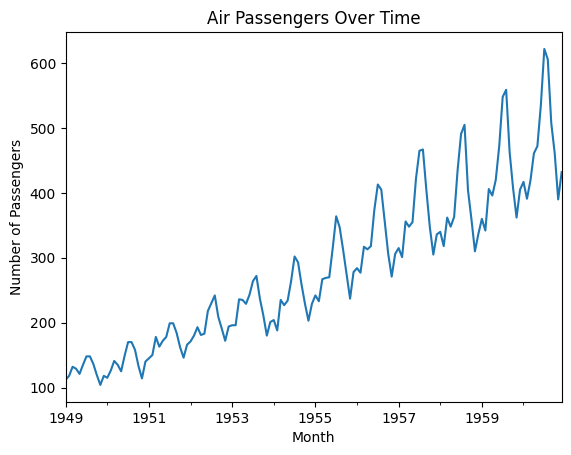

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Временной ряд не является стационарным.


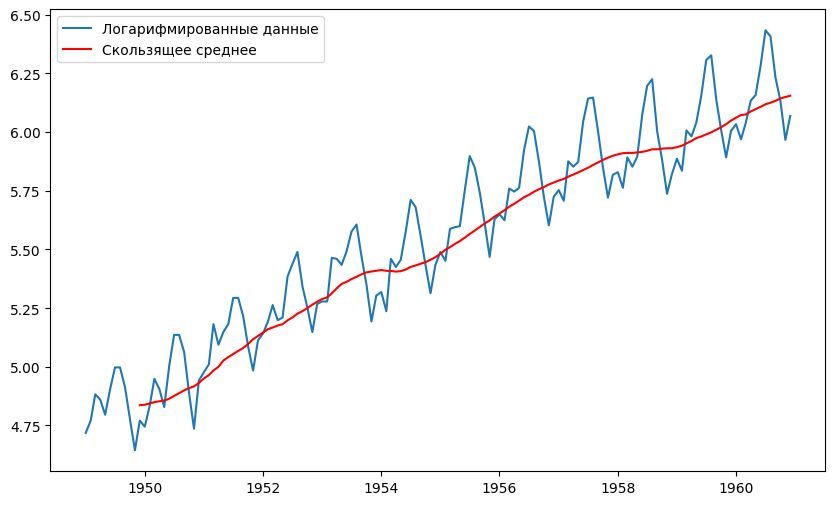

ADF Statistic: -3.162907991300869
p-value: 0.022234630001243157
Временной ряд является стационарным.


c:\Users\mset6\maadLab4\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\mset6\maadLab4\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


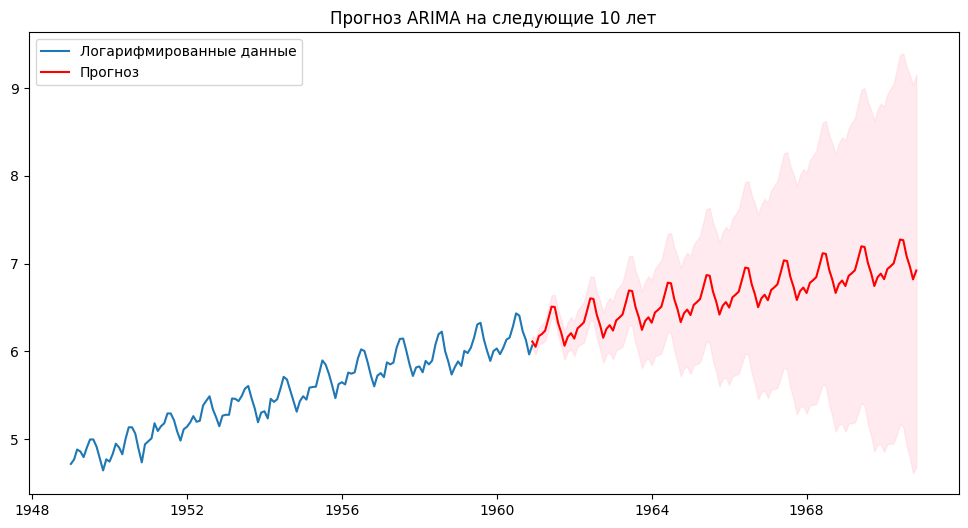

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Загрузить данные
data = pd.read_csv('data/AirPassengers.csv', index_col='Month', parse_dates=True)
data.index.freq = 'MS'  # Установить частоту на начало месяца

# Построить график исходных данных
data.plot(title='Air Passengers Over Time', legend=False)
plt.ylabel('Number of Passengers')
plt.show()

# Проверить, является ли временной ряд стационарным
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("Временной ряд является стационарным.")
    else:
        print("Временной ряд не является стационарным.")

check_stationarity(data['#Passengers'])

# Прологарифмировать данные
log_data = np.log(data['#Passengers'])

# Рассчитать и построить скользящее среднее
moving_avg = log_data.rolling(window=12).mean()
plt.figure(figsize=(10, 6))
plt.plot(log_data, label='Логарифмированные данные')
plt.plot(moving_avg, color='red', label='Скользящее среднее')
plt.legend()
plt.show()

# Вычесть скользящее среднее из логарифмированных данных
data_log_minus_avg = log_data - moving_avg
data_log_minus_avg.dropna(inplace=True)

# Проверить стационарность снова
check_stationarity(data_log_minus_avg)

# Настроить модель ARIMA
model = SARIMAX(log_data, order=(1, 2, 3), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Прогноз на следующие 10 лет (120 месяцев)
forecast = model_fit.get_forecast(steps=120)
forecast_index = pd.date_range(start=data.index[-1], periods=120, freq='MS')
forecast_df = forecast.conf_int()
forecast_df['Forecast'] = forecast.predicted_mean
forecast_df.index = forecast_index

# Построить график прогноза
plt.figure(figsize=(12, 6))
plt.plot(data.index, log_data, label='Логарифмированные данные')
plt.plot(forecast_df.index, forecast_df['Forecast'], color='red', label='Прогноз')
plt.fill_between(forecast_df.index, 
                 forecast_df.iloc[:, 0], 
                 forecast_df.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Прогноз ARIMA на следующие 10 лет')
plt.show()


